# 03/11/21 - This notebook uses the G3CGal GAMA DR3 group catalog to study the group properties of the candidates.
# 03/25/21 - Looking at internal GAMA group catalog G3CGalv10.fits.

In [1]:
# libraries

from pyprojroot import here
print(f'You are here: {here()}')

import numpy as np
import pandas as pd
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import scipy.stats as stats

%matplotlib inline

from astropy import constants as const
from astropy.io import fits
import astropy.units as u
from astropy.cosmology import FlatLambdaCDM, z_at_value

c = const.c.to('km/s').value #c in km/s
h0 = 73.8 #h0 in km/(Mpc*s) Riess2011
cosmo = FlatLambdaCDM(h0, Om0=0.262)

# paths
autoz_path = f'{here()}/'
file_path = f'{autoz_path}files/'
csv_path = f'{file_path}csv/'
fits_path = f'{file_path}fits/'
latest_path = f'{csv_path}latest/'
visual_path = f'{autoz_path}visuals/'
png_path = f'{visual_path}png/'
pdf_path = f'{visual_path}pdf/'
knabel2020_file_path = '/data/sknabel/lens_methods/files/'

You are here: /data/sknabel/autoz_lens_model


In /soft/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /soft/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /soft/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /soft/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /soft/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_tes

In [2]:
# import candidate samples
links = pd.read_csv(f'{latest_path}links_sample_latest.csv')
#links_knabel = pd.read_csv(f'{latest_path}links_knabel_sample_latest_len6.csv')
li = pd.read_csv(f'{latest_path}li_sample_latest.csv')

candidates = pd.concat([links, li])

#print(len(links), len(li))
print(len(candidates))
print(candidates.columns)
print(candidates.head())

42
Index(['Unnamed: 0', 'Unnamed: 0_x', 'GAMA_ID', 'ID', 'RA', 'DEC', 'score',
       'Unnamed: 0_y', 'z1', 'sigma1', 'template1', 'z2', 'sigma2',
       'template2', 'sigma3', 'sigma4', 'R', 'prob', 'error', 'type',
       'type_number', 'lambdar_log_mstar', 'lambdar_mstar',
       'lambdar_log_mstar_error', 'z', 'zlens', 'zsource', 'sigma_lens',
       'sigma_source', 'dlens', 'dsource', 'corrected_stellar_mass', 'P1',
       'P3', 'normalized_score', 'cnn_probability', 'm_half_re', 'sigma_star',
       'theta_e_pm', 'theta_e_sis', 'KIDS_ID', 'mag', 'mag_err', 'name',
       'num_0', 'probability', 'rms', 's*p/10', 'z_max', 'z_min', 'zphot'],
      dtype='object')
   Unnamed: 0  Unnamed: 0_x    GAMA_ID      ID         RA      DEC  score  \
0           0            30   600305.0   245.0  134.75916  0.23814   12.0   
1           1            51   419067.0  1179.0  138.61974  2.63477    8.0   
2           2           115   387244.0  1819.0  135.56917  2.36495    4.0   
3           3    

In [3]:
# load G3CGal.fits or G3CGalv10.fits
#group_catalog = fits.open(f'{fits_path}G3CGal.fits')[1].data
group_catalog = fits.open(f'{fits_path}G3CGalv10.fits')
print(group_catalog[1].header)
groups_data = group_catalog[1].data
print(len(groups_data))
group_byte_swap=groups_data.byteswap().newbyteorder()
groups = pd.DataFrame(group_byte_swap[:])#, columns = group_catalog.columns.names)

groups.rename(columns={'CATAID':'GAMA_ID', 'Dec':'DEC'}, inplace=True)

print(groups.columns)
print(len(groups))

print(groups.head())

print(group_byte_swap[:5])

XTENSION= 'BINTABLE'           / binary table extension                         BITPIX  =                    8 / 8-bit bytes                                    NAXIS   =                    2 / 2-dimensional table                            NAXIS1  =                   84 / width of table in bytes                        NAXIS2  =               204110 / number of rows in table                        PCOUNT  =                    0 / size of special data area                      GCOUNT  =                    1 / one data group                                 TFIELDS =                   21 / number of columns                              EXTNAME = 'G3CGal  '           / table name                                     TTYPE1  = 'CATAID  '           / label for column 1                             TFORM1  = 'J       '           / format for column 1                            TNULL1  =          -2147483648 / blank value for column 1                       TCOMM1  = 'GAMA CATAID'                 

In [8]:
# merge candidates with group
candidates_groups = pd.merge(candidates, groups, how='left', on='GAMA_ID')
candidates_groups.to_csv(f'{csv_path}candidates_groups.csv')
print(candidates_groups.columns)
candidates_groups[['GAMA_ID','ID','score','lambdar_log_mstar','GroupID', 'RankIterCen', 'AngSepIterCen', 'RA_x', 'RA_y']].sort_values(by=['score'], ascending=False)

Index(['Unnamed: 0', 'Unnamed: 0_x', 'GAMA_ID', 'ID', 'RA_x', 'DEC_x', 'score',
       'Unnamed: 0_y', 'z1', 'sigma1', 'template1', 'z2', 'sigma2',
       'template2', 'sigma3', 'sigma4', 'R', 'prob', 'error', 'type',
       'type_number', 'lambdar_log_mstar', 'lambdar_mstar',
       'lambdar_log_mstar_error', 'z', 'zlens', 'zsource', 'sigma_lens',
       'sigma_source', 'dlens', 'dsource', 'corrected_stellar_mass', 'P1',
       'P3', 'normalized_score', 'cnn_probability', 'm_half_re', 'sigma_star',
       'theta_e_pm', 'theta_e_sis', 'KIDS_ID', 'mag', 'mag_err', 'name',
       'num_0', 'probability', 'rms', 's*p/10', 'z_max', 'z_min', 'zphot',
       'RA_y', 'DEC_y', 'Z', 'Rpetro', 'DM_100_25_75', 'SURVEY_CODE', 'SigErr',
       'GroupID', 'RankIterCen', 'SepIterCen', 'CoSepIterCen', 'AngSepIterCen',
       'RankBCG', 'SepBCG', 'CoSepBCG', 'AngSepBCG', 'RankCen', 'SepCen',
       'CoSepCen', 'AngSepCen'],
      dtype='object')


,GAMA_ID,ID,score,lambdar_log_mstar,GroupID,RankIterCen,AngSepIterCen,RA_x,RA_y
18,323152.0,2967.0,30.0,NaN,NaN,NaN,NaN,130.546430,NaN
17,250289.0,2730.0,28.0,11.668818,304825.0,1.0,0.000017,214.367080,214.367059
31,3629152.0,1933.0,26.0,11.630485,106991.0,1.0,0.000000,135.888640,135.888634
19,3575500.0,1906.0,26.0,11.760890,0.0,-999.0,-999.000000,129.232650,129.232641
5,585328.0,3234.0,18.0,11.414567,200094.0,8.0,0.279137,182.368380,182.367994
11,544226.0,3212.0,18.0,11.285226,0.0,-999.0,-999.000000,214.423360,214.423354
32,3891172.0,3056.0,16.0,11.422040,0.0,-999.0,-999.000000,139.227250,139.227171
27,138582.0,2828.0,14.0,11.563930,0.0,-999.0,-999.000000,183.140090,183.139927
0,600305.0,245.0,12.0,11.614862,106211.0,1.0,0.000000,134.759160,134.759112
34,262874.0,26.0,12.0,11.252039,0.0,-999.0,-999.000000,221.610670,221.610700


In [5]:
# check out the different fields

cand = candidates_groups
ra = candidates_groups.RA_x
dec = candidates_groups.DEC_x

G05 = cand[(ra > 129.0) & (ra < 141.0) & (dec > -2.0) & (dec < 3.0) ]
G12 = cand[(ra > 174.0) & (ra < 186.0) & (dec > -3.0) & (dec < 2.0) ]
G15 = cand[(ra > 211.5) & (ra < 223.5) & (dec > -2.0) & (dec < 3.0) ]
equatorial_fields = pd.concat([G05, G12, G15])

print(len(G05), len(G12), len(G15), len(equatorial_fields))
print()
print(G05.GroupID)
print()
print(G12.GroupID)
print()
print(G15.GroupID)


12 11 19 42

0     106211.0
1     100402.0
2          0.0
3     101252.0
4          0.0
18         NaN
19         0.0
20    104184.0
26    102737.0
31    106991.0
32         0.0
33         0.0
Name: GroupID, dtype: float64

5     200094.0
6     207680.0
7     204359.0
8     205820.0
9     202814.0
10    201271.0
21         0.0
22    200540.0
23         0.0
27         0.0
40         0.0
Name: GroupID, dtype: float64

11         0.0
12    303503.0
13         0.0
14         0.0
15    307819.0
16    300672.0
17    304825.0
24         0.0
25         0.0
28         0.0
29    304951.0
30    307621.0
34         0.0
35    301069.0
36    301693.0
37         0.0
38         0.0
39         0.0
41    307498.0
Name: GroupID, dtype: float64


In [6]:
# number of candidates with no group metric - 23
len(candidates_groups[candidates_groups.GroupID.isnull()])

1

In [7]:
#candidates_with_groups = candidates_groups[candidates_groups.GroupID.notnull()]
#candidates_with_groups.reset_index()
#candidates_with_groups.drop(columns={'Unnamed: 0','Unnamed: 0_x'}, inplace=True)
candidates_groups[['GAMA_ID','ID','score','zlens','lambdar_log_mstar','GroupID', 'RA_x', 'RA_y']].sort_values(by=['score'], ascending=False)

,GAMA_ID,ID,score,zlens,lambdar_log_mstar,GroupID,RA_x,RA_y
18,323152.0,2967.0,30.0,0.353286,NaN,NaN,130.546430,NaN
17,250289.0,2730.0,28.0,0.401214,11.668818,304825.0,214.367080,214.367059
31,3629152.0,1933.0,26.0,0.406623,11.630485,106991.0,135.888640,135.888634
19,3575500.0,1906.0,26.0,0.232537,11.760890,0.0,129.232650,129.232641
5,585328.0,3234.0,18.0,0.204663,11.414567,200094.0,182.368380,182.367994
11,544226.0,3212.0,18.0,0.227044,11.285226,0.0,214.423360,214.423354
32,3891172.0,3056.0,16.0,0.339517,11.422040,0.0,139.227250,139.227171
27,138582.0,2828.0,14.0,0.325175,11.563930,0.0,183.140090,183.139927
0,600305.0,245.0,12.0,0.243359,11.614862,106211.0,134.759160,134.759112
34,262874.0,26.0,12.0,0.385581,11.252039,0.0,221.610670,221.610700


In [16]:
# split between isos and groups is 10-9
isos = candidates_groups[candidates_groups.GroupID == 0.0]
groups = candidates_groups[candidates_groups.GroupID != 0.0]
print(len(isos), len(groups))

19 23


/soft/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:836: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/soft/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:837: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/soft/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:836: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/soft/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:837: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/soft/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:836: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/soft/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:837: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/soft/anaconda3/lib/python3.7/s

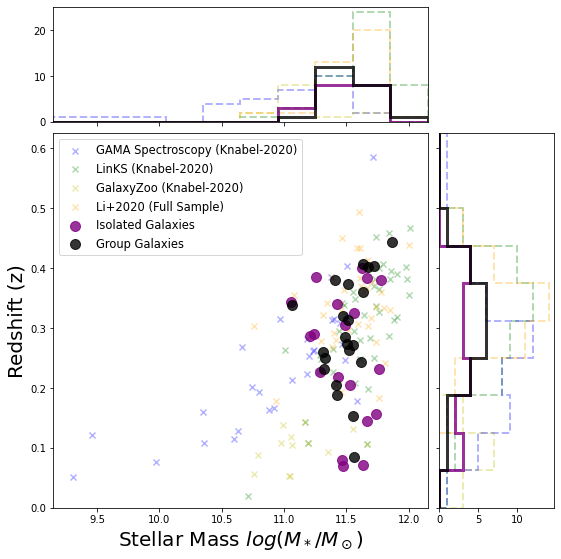

In [17]:
# pull datasets from Knabel-2020
spec = pd.read_csv(f'{knabel2020_file_path}spec_lambdar_revisions_063020.csv')
mac = pd.read_csv(f'{knabel2020_file_path}mac_lambdar_revisions_063020.csv')
zoo = pd.read_csv(f'{knabel2020_file_path}zoo_lambdar_revisions_063020.csv')
li_full = pd.read_csv(f'{knabel2020_file_path}li_lambdar.csv')

# Three-panel plot
from matplotlib.ticker import NullFormatter
nullfmt   = NullFormatter()         # no labels
# definitions for the axes
left, width = 0.1, 0.65
lower, height = 0.1, 0.65
lower_h = left_h = left+width+0.02
    
rect_scatter = [left, lower, width, height]
rect_histx = [left, lower_h, width, 0.2]
rect_histy = [left_h, lower, 0.2, height]
    
    # start with a rectangular Figure
plt.figure(1, figsize=(8,8))
    
axScatter = plt.axes(rect_scatter)
axHistx = plt.axes(rect_histx)
axHisty = plt.axes(rect_histy)
    
    # no labels
axHistx.xaxis.set_major_formatter(nullfmt)
axHisty.yaxis.set_major_formatter(nullfmt)


# knabel2020 data
axScatter.scatter(spec.lambdar_log_mstar, spec.z_lens, 
               marker='x', color='b', alpha = 0.3, label='GAMA Spectroscopy (Knabel-2020)')
axScatter.scatter(mac.lambdar_log_mstar, mac.z, 
               marker='x', color='g', alpha = 0.3, label='LinKS (Knabel-2020)')
axScatter.scatter(zoo.lambdar_log_mstar, zoo.z, 
               marker='x', color='y', alpha = 0.3, label='GalaxyZoo (Knabel-2020)')
axScatter.scatter(li_full.lambdar_log_mstar, li_full.z, 
               marker='x', color='orange', alpha = 0.3, label='Li+2020 (Full Sample)')

# autoz data
#axScatter.scatter(links.lambdar_log_mstar, links.zlens, 
#               marker='o',color='k', alpha = 0.8, label='LinKS AUTOZ Sample')
#axScatter.scatter(links_knabel.lambdar_log_mstar, links_knabel.zlens, 
#               marker='o',color='g', alpha = 0.8, label='LinKS (Knabel-2020) AUTOZ Sample')
#axScatter.scatter(li.lambdar_log_mstar, li.zlens, 
#               marker='o', color='orange', alpha = 0.8, label='Li+2020 AUTOZ Sample')

#group data
axScatter.scatter(isos.lambdar_log_mstar, isos.zlens, 
               marker='o',color='purple', s=100, alpha = 0.8, label='Isolated Galaxies')
axScatter.scatter(groups.lambdar_log_mstar, groups.zlens, 
               marker='o',color='k', s=100, alpha = 0.8, label='Group Galaxies')

axScatter.legend(loc='upper left', numpoints=1, fontsize = 11.5)

axScatter.axis([9.15,12.15,0.,0.625])#, prop={'size':25})

axScatter.set_xlabel(r'Stellar Mass $log(M_*/M_\odot)$', fontsize=20)
axScatter.set_ylabel(r'Redshift (z)', fontsize=20)
    
#xbins = np.arange(8.5, 12.5, xbinwidth)
#ybins = np.arange(0., 0.6, ybinwidth)

# knabel2020 histograms redshift
axHisty.hist(zoo.z, orientation='horizontal', range=[0,0.625], 
             bins=10,color='y', histtype = 'step', linestyle='--', linewidth=2, alpha=0.3)
axHisty.hist(mac.z, orientation='horizontal', range=[0,0.625], 
             bins=10,color='g', histtype = 'step', linestyle='--', linewidth=2, alpha=0.3)
axHisty.hist(spec.z_lens, orientation='horizontal', range=[0,0.625],  
             bins=10,color='b',  histtype = 'step', linestyle='--', linewidth=2, alpha=0.3)
axHisty.hist(li_full.z, orientation='horizontal', range=[0,0.625],  
             bins=10,color='orange',  histtype = 'step', linestyle='--', linewidth=2, alpha=0.3)
# autoz histograms redshift
#axHisty.hist(links.zlens, orientation='horizontal', range=[0,0.625], 
#             bins=10,color='k', histtype = 'step', linewidth=3, alpha=0.8)
#axHisty.hist(links_knabel.zlens, orientation='horizontal', range=[0,0.625],  
#             bins=10,color='g',  histtype = 'step', linewidth=3, alpha=0.8)
#axHisty.hist(li.zlens, orientation='horizontal', range=[0,0.625],  
#             bins=10,color='orange',  histtype = 'step', linewidth=3, alpha=0.8)
# groups histograms redshift
axHisty.hist(isos.zlens, orientation='horizontal', range=[0,0.625], 
             bins=10,color='purple', histtype = 'step', linewidth=3, alpha=0.8)
axHisty.hist(groups.zlens, orientation='horizontal', range=[0,0.625],  
             bins=10,color='k',  histtype = 'step', linewidth=3, alpha=0.8)


# knabel2020 histograms mass
axHistx.hist(spec.lambdar_log_mstar, range=[9.15,12.15], 
             bins=10,color='b', histtype = 'step', linestyle='--', linewidth=2, alpha=0.3)
axHistx.hist(mac.lambdar_log_mstar, range=[9.15,12.15], 
             bins=10,color='g', histtype = 'step', linestyle='--', linewidth=2, alpha=0.3)
axHistx.hist(zoo.lambdar_log_mstar, range=[9.15,12.15], 
             bins=10,color='y', histtype = 'step', linestyle='--', linewidth=2, alpha=0.3)
axHistx.hist(li_full.lambdar_log_mstar, range=[9.15,12.15],  
             bins=10, color='orange',  histtype = 'step', linestyle='--', linewidth=2, alpha=0.3)
# autoz histograms mass
#axHistx.hist(links.lambdar_log_mstar, range=[9.15,12.15], 
#             bins=10,color='k', histtype = 'step', linewidth=3, alpha=0.8)
#axHistx.hist(links_knabel.lambdar_log_mstar, range=[9.15,12.15],  
#             bins=10,color='g',  histtype = 'step', linewidth=3, alpha=0.8)
#axHistx.hist(li.lambdar_log_mstar, range=[9.15,12.15],  
#             bins=10,color='orange',  histtype = 'step', linewidth=3, alpha=0.8)
# groups histograms mass
axHistx.hist(isos.lambdar_log_mstar, range=[9.15,12.15], 
             bins=10,color='purple', histtype = 'step', linewidth=3, alpha=0.8)
axHistx.hist(groups.lambdar_log_mstar, range=[9.15,12.15],  
             bins=10,color='k',  histtype = 'step', linewidth=3, alpha=0.8)

axHistx.set_xlim( axScatter.get_xlim() )
axHisty.set_ylim( axScatter.get_ylim() )

plt.savefig(f'{png_path}big_plot_groups.png')

In [10]:
# pull in the group_id friends of friends catalog
# load G3CFoFGroup.fits
friends_data = fits.open(f'{fits_path}G3CFoFGroup.fits')[1].data
friends_byte_swap=friends_data.byteswap().newbyteorder()
friends = pd.DataFrame(friends_byte_swap[:])#, columns = group_catalog.columns.names)

#friends.rename(columns={'CATAID':'GAMA_ID', 'Dec':'DEC'}, inplace=True)

print(friends_data.columns)
print(len(friends))

print(friends.head())

#print(friends_byte_swap[:5])

ColDefs(
    name = 'GroupID'; format = 'J'; null = -2147483648
    name = 'Nfof'; format = 'I'; null = -32768
    name = 'IterCenCATAID'; format = 'J'; null = -2147483648
    name = 'IterCenRA'; format = 'D'; unit = 'deg'
    name = 'IterCenDec'; format = 'D'; unit = 'deg'
    name = 'IterCenZ'; format = 'E'
    name = 'Zfof'; format = 'E'
    name = 'Rad50'; format = 'E'; unit = 'Mpc/h'
    name = 'Rad1Sig'; format = 'E'; unit = 'Mpc/h'
    name = 'Rad100'; format = 'E'; unit = 'Mpc/h'
    name = 'RelDen'; format = 'E'
    name = 'Zcomp'; format = 'E'
    name = 'GroupEdge'; format = 'E'
    name = 'VelDisp'; format = 'E'; unit = 'km/s'
    name = 'VelDispRaw'; format = 'E'; unit = 'km/s'
    name = 'VelErr'; format = 'E'; unit = 'km/s'
    name = 'TotRmag'; format = 'E'; unit = 'mag-5log(h)'
    name = 'TotFluxProxy'; format = 'E'
    name = 'MassProxy'; format = 'E'
    name = 'BCGCATAID'; format = 'J'; null = -2147483648
    name = 'BCGRA'; format = 'D'; unit = 'deg'
    name = 'B

In [20]:
groups_friends = pd.merge(groups, friends, how='left', on='GroupID')
groups_friends[['GAMA_ID','ID','score','zlens','GroupID','RankIterCen','SepIterCen','AngSepIterCen','Nfof','lambdar_mstar','MassA','RA_x','IterCenRA','DEC_x','IterCenDec','GroupEdge']].sort_values(by=['score'], ascending=False)

,GAMA_ID,ID,score,zlens,GroupID,RankIterCen,SepIterCen,AngSepIterCen,Nfof,lambdar_mstar,MassA,RA_x,IterCenRA,DEC_x,IterCenDec,GroupEdge
3,250289.0,2730.0,28.0,0.401214,304825.0,1.0,0.004347,0.000017,2,4.664644e+11,5.441018e+12,214.36708,214.367059,1.993110,1.993111,1.0
0,62734.0,539.0,8.0,0.274168,303503.0,2.0,269.812042,0.800091,2,3.211100e+11,0.000000e+00,213.56206,213.501254,-0.241680,-0.197817,1.0
6,296451.0,2635.0,8.0,0.444535,301069.0,1.0,0.003074,0.000012,5,7.275185e+11,2.548408e+15,211.85399,211.853981,1.555360,1.555372,1.0
7,77312.0,2749.0,8.0,0.372997,301693.0,1.0,0.000000,0.000000,3,3.227160e+11,1.800312e+12,212.84528,212.845196,0.023370,0.023309,1.0
8,569641.0,NaN,4.6,0.359714,307498.0,1.0,0.003074,0.000011,2,4.327615e+11,0.000000e+00,219.72969,219.729688,-0.597266,-0.597308,1.0
1,617569.0,1418.0,4.0,0.313870,307819.0,1.0,0.004347,0.000014,2,3.222395e+11,3.433381e+14,212.16078,212.160755,0.240100,0.240095,1.0
2,342310.0,2163.0,4.0,0.379751,300672.0,4.0,195.002930,0.732193,5,2.545802e+11,3.786502e+15,215.08101,215.068992,2.171340,2.224223,1.0
4,251874.0,2253.0,4.0,0.339009,304951.0,1.0,0.003074,0.000011,2,1.157077e+11,1.073513e+12,220.77951,220.779455,1.972890,1.972835,1.0
5,592910.0,1852.0,4.0,0.263443,307621.0,1.0,0.000000,0.000000,2,3.302180e+11,1.197340e+13,214.63086,214.630865,-0.014640,-0.014630,1.0


SepIterCen supposed to be the projected angular separation in arcsec from the group IterCen coordinates.

AngSepIterCen is the angular size distance.  	(Mpc/h)

GroupEdge is 1.0 for good data.

(array([7., 0., 0., 1., 0., 0., 0., 0., 0., 1.]),
 array([1. , 1.3, 1.6, 1.9, 2.2, 2.5, 2.8, 3.1, 3.4, 3.7, 4. ]),
 <BarContainer object of 10 artists>)

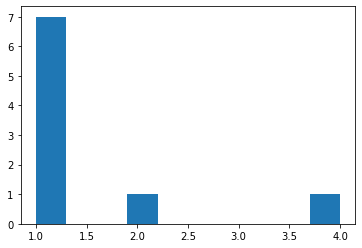

In [12]:
# hist of ranks
plt.figure()
plt.hist(groups_friends.RankIterCen)
#plt.hist(groups_friends.Nfof)

7 7


(0.0, 0.65)

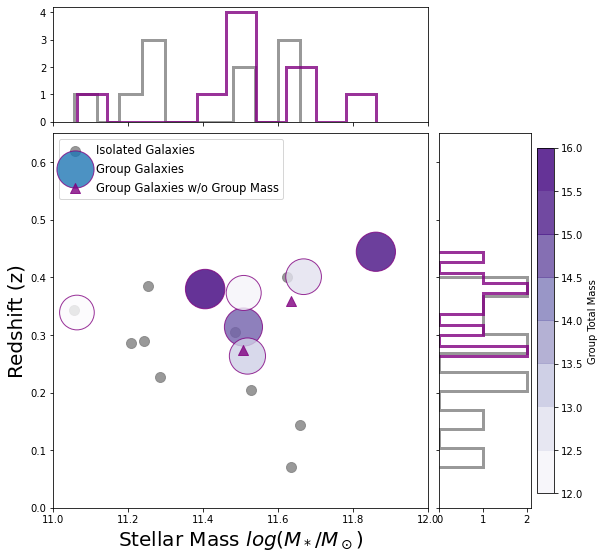

In [13]:
# Three-panel plot
from matplotlib.ticker import NullFormatter
nullfmt   = NullFormatter()         # no labels
# definitions for the axes
left, width = 0.1, 0.65
lower, height = 0.1, 0.65
lower_h = left_h = left+width+0.02
    
rect_scatter = [left, lower, width, height]
rect_histx = [left, lower_h, width, 0.2]
rect_histy = [left_h, lower, 0.2, height]
    
    # start with a rectangular Figure
plt.figure(1, figsize=(8,8))
    
axScatter = plt.axes(rect_scatter)
axHistx = plt.axes(rect_histx)
axHisty = plt.axes(rect_histy)
    
    # no labels
axHistx.xaxis.set_major_formatter(nullfmt)
axHisty.yaxis.set_major_formatter(nullfmt)


# autoz data
#axScatter.scatter(links.lambdar_log_mstar, links.zlens, 
#               marker='o',color='k', alpha = 0.8, label='LinKS AUTOZ Sample')
#axScatter.scatter(links_knabel.lambdar_log_mstar, links_knabel.zlens, 
#               marker='o',color='g', alpha = 0.8, label='LinKS (Knabel-2020) AUTOZ Sample')
#axScatter.scatter(li.lambdar_log_mstar, li.zlens, 
#               marker='o', color='orange', alpha = 0.8, label='Li+2020 AUTOZ Sample')

massless = groups_friends[groups_friends.MassA == 0]
has_mass = groups_friends[groups_friends.MassA != 0]
group_mass = np.log10(has_mass.MassA)
c = group_mass
s = 100*group_mass
print(len(has_mass),len(s))

#group data
axScatter.scatter(isos.lambdar_log_mstar, isos.zlens, 
               marker='o',color='gray', s=100, alpha = 0.8, label='Isolated Galaxies')
group_scatter = axScatter.scatter(has_mass.lambdar_log_mstar, has_mass.zlens, 
                                  marker='o',c=c, s=s, edgecolor='purple', label='Group Galaxies', cmap='Purples',alpha = 0.8)
axScatter.scatter(massless.lambdar_log_mstar, massless.zlens,
                  marker='^',c='purple', label='Group Galaxies w/o Group Mass', s=100, alpha = 0.8)

plt.cbar = plt.colorbar(group_scatter, 
                        shrink=1, 
                        orientation='vertical',
                       boundaries=(np.linspace(12, 16, 9)),
                       #ticks = ([0, 10, 20, 30, 40, 50, 60, 70])) #, anchor=(0,1.5)
                       )
plt.cbar.set_label('Group Total Mass', fontsize=10)

axScatter.legend(loc='upper left', numpoints=1, fontsize = 11.5)

axScatter.axis([11.0,12.0,0.0,0.65])#, prop={'size':25})

axScatter.set_xlabel(r'Stellar Mass $log(M_*/M_\odot)$', fontsize=20)
axScatter.set_ylabel(r'Redshift (z)', fontsize=20)
    
#xbins = np.arange(8.5, 12.5, xbinwidth)
#ybins = np.arange(0., 0.6, ybinwidth)

# knabel2020 histograms redshift
# autoz histograms redshift
#axHisty.hist(links.zlens, orientation='horizontal', range=[0,0.625], 
#             bins=10,color='k', histtype = 'step', linewidth=3, alpha=0.8)
#axHisty.hist(links_knabel.zlens, orientation='horizontal', range=[0,0.625],  
#             bins=10,color='g',  histtype = 'step', linewidth=3, alpha=0.8)
#axHisty.hist(li.zlens, orientation='horizontal', range=[0,0.625],  
#             bins=10,color='orange',  histtype = 'step', linewidth=3, alpha=0.8)
# groups histograms redshift
axHisty.hist(isos.zlens, orientation='horizontal', #range=[0,0.625], 
             bins=10,color='gray', histtype = 'step', linewidth=3, alpha=0.8)
axHisty.hist(groups.zlens, orientation='horizontal', #range=[0,0.625],  
             bins=10,color='purple',  histtype = 'step', linewidth=3, alpha=0.8)


# knabel2020 histograms mass
# autoz histograms mass
#axHistx.hist(links.lambdar_log_mstar, range=[9.15,12.15], 
#             bins=10,color='k', histtype = 'step', linewidth=3, alpha=0.8)
#axHistx.hist(links_knabel.lambdar_log_mstar, range=[9.15,12.15],  
#             bins=10,color='g',  histtype = 'step', linewidth=3, alpha=0.8)
#axHistx.hist(li.lambdar_log_mstar, range=[9.15,12.15],  
#             bins=10,color='orange',  histtype = 'step', linewidth=3, alpha=0.8)
# groups histograms mass
axHistx.hist(isos.lambdar_log_mstar, #range=[9.15,12.15], 
             bins=10,color='gray', histtype = 'step', linewidth=3, alpha=0.8)
axHistx.hist(groups.lambdar_log_mstar, #range=[9.15,12.15],  
             bins=10,color='purple',  histtype = 'step', linewidth=3, alpha=0.8)

axHistx.set_xlim( axScatter.get_xlim() )
axHisty.set_ylim( axScatter.get_ylim() )

#plt.savefig(f'{pdf_path}big_plot_li.pdf')

(array([2., 1., 1., 0., 0., 0., 0., 1., 0., 2.]),
 array([12.0308075, 12.3855505, 12.7402935, 13.0950365, 13.4497795,
        13.804523 , 14.159266 , 14.514009 , 14.8687525, 15.2234955,
        15.5782385], dtype=float32),
 <BarContainer object of 10 artists>)

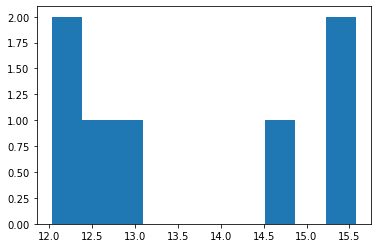

In [14]:
plt.hist(np.log10(has_mass.MassA))

In [9]:
# plot total group mass to galaxy stellar mass

has_mass.log_MassA = np.log10(has_mass.MassA)

c = has_mass.RankIterCen

figure, axs = plt.subplots(figsize=(8, 6))
scatter = axs.scatter(has_mass.lambdar_log_mstar, has_mass.log_MassA, 
              marker='o',c=c, edgecolor='black', label='Group Galaxies', s=200, cmap='plasma',alpha = 0.8)

plt.colorbar(scatter, boundaries = np.linspace(0,5,6), label='Ranking of Galaxy from Group Center')
axs.set_title('Total Group Mass to Galaxy Stellar Mass', fontsize=16)
axs.set_xlabel(r'Stellar Mass $log(M_*/M_\odot)$', fontsize=16)
axs.set_ylabel(r'Total Group Mass $log(M_*/M_\odot)$', fontsize=16)

plt.savefig(f'{png_path}group_mass_to_stellar_mass.png')

NameError: name 'has_mass' is not defined

Text(0, 0.5, 'Total Group Mass $log(M_*/M_\\odot)$')

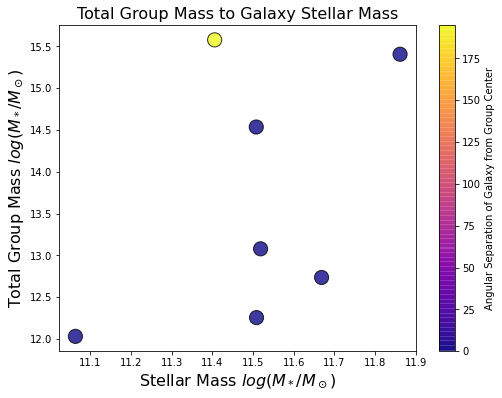

In [16]:
# plot total group mass to 

c = has_mass.SepIterCen

figure, axs = plt.subplots(figsize=(8, 6))
scatter = axs.scatter(has_mass.lambdar_log_mstar, has_mass.log_MassA, 
              marker='o',c=c, edgecolor='black', label='Group Galaxies', s=200, cmap='plasma',alpha = 0.8)

plt.colorbar(scatter, label='Angular Separation of Galaxy from Group Center')#, boundaries = np.linspace(0,5,6), label='Ranking of Galaxy from Group Center')
axs.set_title('Total Group Mass to Galaxy Stellar Mass', fontsize=16)
axs.set_xlabel(r'Stellar Mass $log(M_*/M_\odot)$', fontsize=16)
axs.set_ylabel(r'Total Group Mass $log(M_*/M_\odot)$', fontsize=16)